<a href="https://colab.research.google.com/github/jettecampbell/data-science/blob/main/Copy_of_Unit2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Erling Haaland's Penalty Kick Score Rate

In [ ]:
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

Having watched a fair amount of soccer, I am moderalty confident in my prior prediction. I know that pentalty kicks in soccer generally have a high score rate over 50%, and that Haaland is one of the top players and penalty takers in the Premier League at the moment. For my prior I plotted that Haaland makes 16 pentalty kicks out of 18 attempts.

<Axes: >

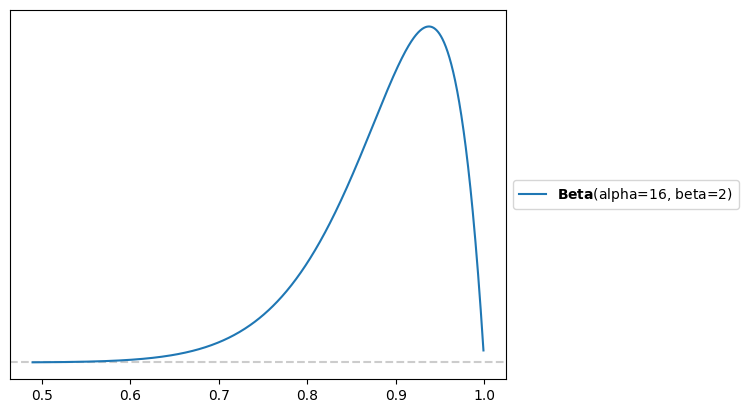

In [ ]:
#plotting the beta distribution with shape parameter 16 and scale parameter 2
pz.Beta(alpha=16,beta=2).plot_pdf()

<Axes: title={'center': 'θ'}>

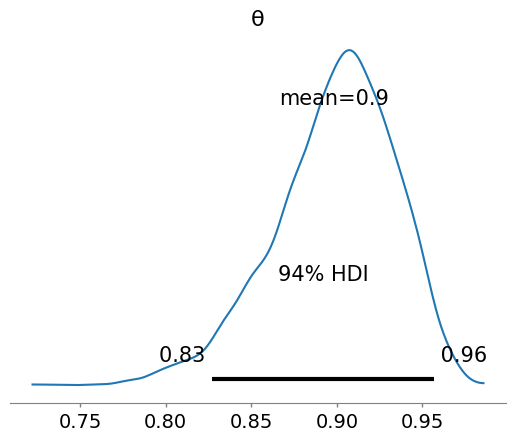

In [ ]:
#Haaland's penalty kicks across his career, makes then misses
PK_data = np.repeat([1,0], repeats = [46,5])


with pm.Model() as haaland_PK_model:
  #same prior from before based on career data
  θ = pm.Beta('θ' , alpha = 16. , beta = 2.)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = PK_data)

  #sample from the posterior, 2000 for a more prcise picture later
  idata_PK = pm.sample(2000)

#vizualize the 2000 samples from the pymc model of the posterior
az.plot_posterior(idata_PK)

This posterior graph shows that Haaland's mean PK percentage is 90% and is 94% likely to be between 83% and 96%. This result does not suprise me because I predicted that his score percentage would be around 90% based on what I knew about him as a player and penaltys in general. However, considering this data is from his entire career, I am suprised that his PK rate is so high because I would assume it would be lower in his early years in the league.